In [2]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [62]:
def bg_cum_dist(z: np.ndarray, z_star: float, beta: float, gamma: float):
    return np.exp(-(gamma/beta*(z-z_star))**(-1/gamma))

def bg_pdf_dist(z: np.ndarray, z_star: float, beta: float, gamma: float):
    return 1/beta * (gamma/beta*(z-z_star))**(-1/gamma -1) * np.exp(-(gamma/beta*(z-z_star))**(-1/gamma))

def bg_log_likelihood(z: np.ndarray, z_star: float, beta: float, gamma: float):
    return -np.sum(np.log(beta) + (1/gamma + 1 ) * np.log(gamma/beta*(z-z_star)) - (gamma/beta*(z-z_star))**(-1/gamma))

def bg_ll_jac(z: np.ndarray, z_star: float, beta: float, gamma: float):
    jac = np.zeros([2])
    # dll/beta
    jac[0] = -np.sum(1/beta - (1/gamma +1) / (gamma/beta*(z-z_star)) * gamma/beta -(gamma/beta*(z-z_star))**(-1/gamma -1))
    jac[1] = -np.sum()
    return jac


#\log\left(\mathcal{L}\left(z; z^{*}, \beta, \gamma\right)\right) & = & - n \log \beta - \left(1+\frac{1}{\gamma}\right)\sum_{i=1}^{n} \log\left(2+\frac{\gamma}{\beta}\left(z_i - z^{*}\right)\right) \\ &&- \sum_{i=1}^{n}\left(2+ \frac{\gamma}{\beta}\left(z_i - z^{*}\right)\right)^{-\frac{1}{\gamma}}.


In [63]:
z = np.array([1, 2, 3, 4, 5])
z_star = 6

In [64]:
from scipy.optimize import minimize

mins = minimize(lambda x: -bg_log_likelihood(z, z_star, x[0], x[1]), 
         x0=[np.std(z),-0.1], bounds=[(0.01, None), (None, -0.01)])

In [65]:
mins.x

array([ 0.01, -0.01])

In [72]:
znew = np.linspace(4, 5.99, num=100)

rp = 1 / (1 - bg_cum_dist(znew, z_star, mins.x[0], mins.x[1]))

/tmp/ipykernel_195576/3595758468.py:3: RuntimeWarning: divide by zero encountered in divide
  rp = 1 / (1 - bg_cum_dist(znew, z_star, mins.x[0], mins.x[1]))


In [73]:
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults
plot_defaults()

Text(0.5, 0, 'Return Period [years]')

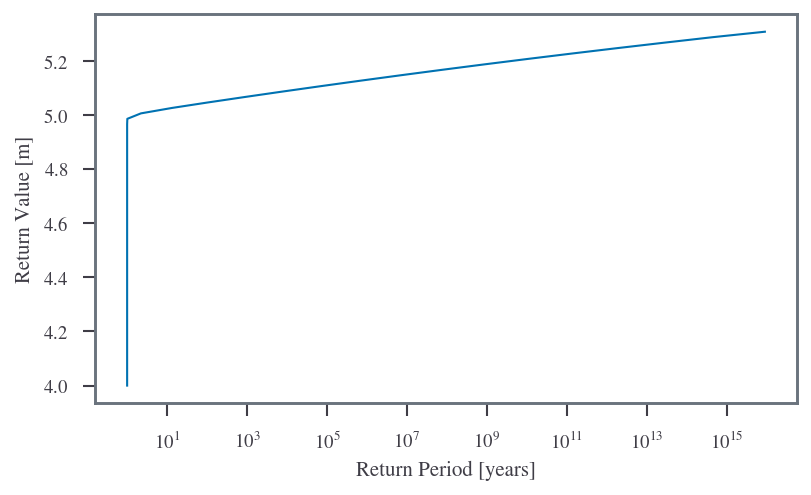

In [74]:
plt.semilogx(rp, znew)
plt.ylabel("Return Value [m]")
plt.xlabel("Return Period [years]")
# plot a horizontal line at z_star
